#Part A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
R=3 # A,B ,C       
n,m=15,3
A=np.array([-1,1,-1,1,-1,1,1,1,1,1,-1,1,1,-1,1]).reshape((1,n))
B=np.array([1,1,-1,1,-1,1,1,1,-1,1,-1,1,1,1,-1]).reshape((1,n))
C=np.array([-1,1,1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1]).reshape((1,n))
D=np.array([1,1,-1,1,-1,1,1,-1,1,1,-1,1,1,1,-1]).reshape((1,n))
E=np.array([1,1,1,1,-1,-1,1,1,-1,1,-1,-1,1,1,1]).reshape((1,n))
F=np.array([1,1,1,1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1]).reshape((1,n))
G=np.array([-1,1,1,1,-1,-1,1,-1,1,1,-1,1,-1,1,1]).reshape((1,n))
H=np.array([1,-1,1,1,-1,1,1,1,1,1,-1,1,1,-1,1]).reshape((1,n))

In [2]:
a_map=np.array([-1,-1,-1])
b_map=np.array([-1,-1,1])
c_map=np.array([-1,1,-1])

In [3]:
dataset=np.array([[A,a_map],[B,b_map],[C,c_map]], dtype="object")

In [4]:
#Weights
W=np.zeros((n,m))
for d in dataset:
    s, t = np.array(d[0]).flatten(), np.array(d[1]).flatten()
    W += np.transpose(np.array([s])).dot(np.array([t]))

In [5]:
W

array([[ 1., -1.,  3.],
       [-3., -1., -1.],
       [ 1.,  3., -1.],
       [-3., -1., -1.],
       [ 3.,  1.,  1.],
       [-1., -3.,  1.],
       [-3., -1., -1.],
       [-1., -3.,  1.],
       [ 1., -1., -1.],
       [-3., -1., -1.],
       [ 3.,  1.,  1.],
       [-1., -3.,  1.],
       [-1., -3.,  1.],
       [-1.,  1.,  1.],
       [-1.,  1., -3.]])

#Part B

for input A  forward path in mem matched 
for input B  forward path in mem matched 
for input C  forward path in mem matched 


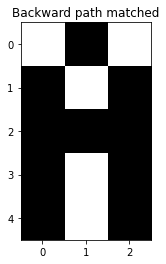

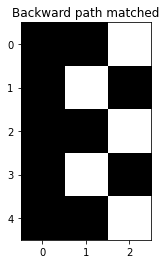

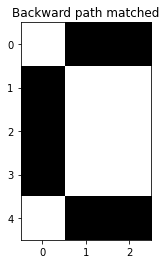

In [6]:
##Cheking The mem
import string
for h in range(R):
  if (np.sign(np.matmul(dataset[h][0],W))-dataset[h][1].reshape((1,3))==0).all():
    print('for input',string.ascii_uppercase[h] ,' forward path in mem matched ')
    plt.figure()
    plt.title("Backward path matched")
    plt.imshow(np.sign(np.matmul(dataset[h][1],W.T)).reshape((5,3)),cmap="Greys")

#Part C: Noisy Evaluation

In [7]:
def evaluate_one_data_one_way(new_s, s, t, W):
    x = (np.array([new_s]))
    ox = np.zeros_like(x)
    oy = np.zeros_like(np.array([t]))
    while True:
        y = np.sign(x.dot(W))
        x = np.sign(y.dot(W.T))
        if((ox==x).all() and (oy==y).all()):
            evaluation = ((y==t).all() and (x==s).all())
            break
        ox, oy = x, y
    return evaluation

In [8]:
def evaluate(dataset, W, noise):
    forward_eval, backward_eval = np.zeros(len(dataset)), np.zeros(len(dataset))
    for i, d in enumerate(dataset):
        s, t = np.array(d[0]).flatten(), np.array(d[1]).flatten()
        input_s = s.copy()
        
        if(noise!=0):
            n = len(s)
            ind = np.random.choice(range(n), int(noise*n+0.5), replace=False)
            input_s[ind] *= -1

        forward_eval[i]  = evaluate_one_data_one_way(input_s, s, t, W)
    return forward_eval

In [9]:
n_experiments = 100
noise = [0.1, 0.4]

for noise_ratio in noise:
    evaluation = np.zeros(3)
    for _ in range(n_experiments):
        evaluation += evaluate(dataset, W, noise_ratio)
    print(f"noise ratio of {noise_ratio*100}%, network was able to",
         f"assocoate target pattern in {evaluation/n_experiments*100}% of times for (A,B,C) noisy inputs.")

noise ratio of 10.0%, network was able to assocoate target pattern in [ 99.  86. 100.]% of times for (A,B,C) noisy inputs.
noise ratio of 40.0%, network was able to assocoate target pattern in [36. 26. 40.]% of times for (A,B,C) noisy inputs.


#Part D

(-0.5, 2.5, 4.5, -0.5)

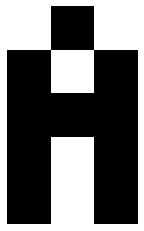

In [10]:
inn=np.array([0,-1,-1]).reshape((1,3))
plt.figure()
plt.imshow((np.sign(np.matmul(inn,W.T))).reshape((5,3)),cmap="Greys")
plt.axis("off")